!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
# importo train e test dataset
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [3]:
# prima vista del dataset, si possono vedere le colonne e alcuni valori contenuti
train_dataset

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,8274,15709643,Gray,675,France,Male,32,1,0.00,3,1,0,85901.09
1,0,7708,15655859,Munro,848,Spain,Male,35,5,120046.74,2,1,0,84710.65
2,0,8628,15777830,Hutchinson,639,France,Female,42,4,0.00,2,0,0,167682.37
3,0,8470,15799534,McClaran,720,France,Male,71,5,183135.39,2,1,1,197688.50
4,0,6680,15722813,Byrne,470,Spain,Male,30,4,125385.01,1,1,0,68293.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,1,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21
6396,0,7691,15692258,Thompson,569,Spain,Male,31,1,115406.97,1,0,0,145528.22
6397,0,7759,15684358,Kang,711,France,Male,41,3,0.00,2,1,1,193747.57
6398,0,9010,15729087,Suttor,751,Germany,Male,54,9,156367.60,2,0,1,116179.92


In [4]:

# si vuole capire quanti valori nulli siano effettivamente presenti nel dataset
train_dataset.isna().sum()

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [5]:
test_dataset.isna().sum()

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [6]:

# controllo quanti siano i valori distinti per name, voglio vedere se sono univoci, in caso posso droppare la colonna perché non
# influisce sul risultato finale
train_dataset['CustomerId'].nunique()

6400

In [7]:
train_dataset['RowNumber'].nunique()

6400

In [8]:
# il nome dei pokemon non è rilevante essendo unico per ogni pokemon, quindi si può droppare la colonna
# sia il nome dei primo che del secondo pokemon
train_dataset = train_dataset.drop('RowNumber', axis=1)

#ripeto tutto per il dataset di test
test_dataset = test_dataset.drop('RowNumber', axis=1)

In [9]:

# il nome dei pokemon non è rilevante essendo unico per ogni pokemon, quindi si può droppare la colonna
# sia il nome dei primo che del secondo pokemon
train_dataset = train_dataset.drop('CustomerId', axis=1)

#ripeto tutto per il dataset di test
test_dataset = test_dataset.drop('CustomerId', axis=1)


In [10]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exited           6400 non-null   int64  
 1   Surname          6400 non-null   object 
 2   CreditScore      6400 non-null   int64  
 3   Geography        6400 non-null   object 
 4   Gender           6400 non-null   object 
 5   Age              6400 non-null   int64  
 6   Tenure           6400 non-null   int64  
 7   Balance          6400 non-null   float64
 8   NumOfProducts    6400 non-null   int64  
 9   HasCrCard        6400 non-null   int64  
 10  IsActiveMember   6400 non-null   int64  
 11  EstimatedSalary  6400 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 600.1+ KB


In [11]:

# funzione che restituisce i nomi di tutte le colonne di tipo object
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

# funzione che restituisce i nomi di tutte le colonne di tipo bool
def get_bool_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'bool']

In [12]:
# lista che contiene tutte le colonne con valori di tipo object

categorical_features = get_categorical_columns(train_dataset)

# lista che contiene tutte le colonne con valori di tipo bool

binary_features = get_bool_columns(train_dataset)

In [14]:
# encoding per features nel test e train dataset
labelEncoder_X = LabelEncoder()

for element in categorical_features:
    train_dataset[element] = labelEncoder_X.fit_transform(train_dataset[element])

for element in categorical_features:
    test_dataset[element] = labelEncoder_X.fit_transform(test_dataset[element])

In [15]:
train_dataset.head()

,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,833,675,0,1,32,1,0.00,3,1,0,85901.09
1,0,1494,848,2,1,35,5,120046.74,2,1,0,84710.65
2,0,1006,639,0,0,42,4,0.00,2,0,0,167682.37
3,0,1384,720,0,1,71,5,183135.39,2,1,1,197688.50
4,0,307,470,2,1,30,4,125385.01,1,1,0,68293.93


<AxesSubplot:>

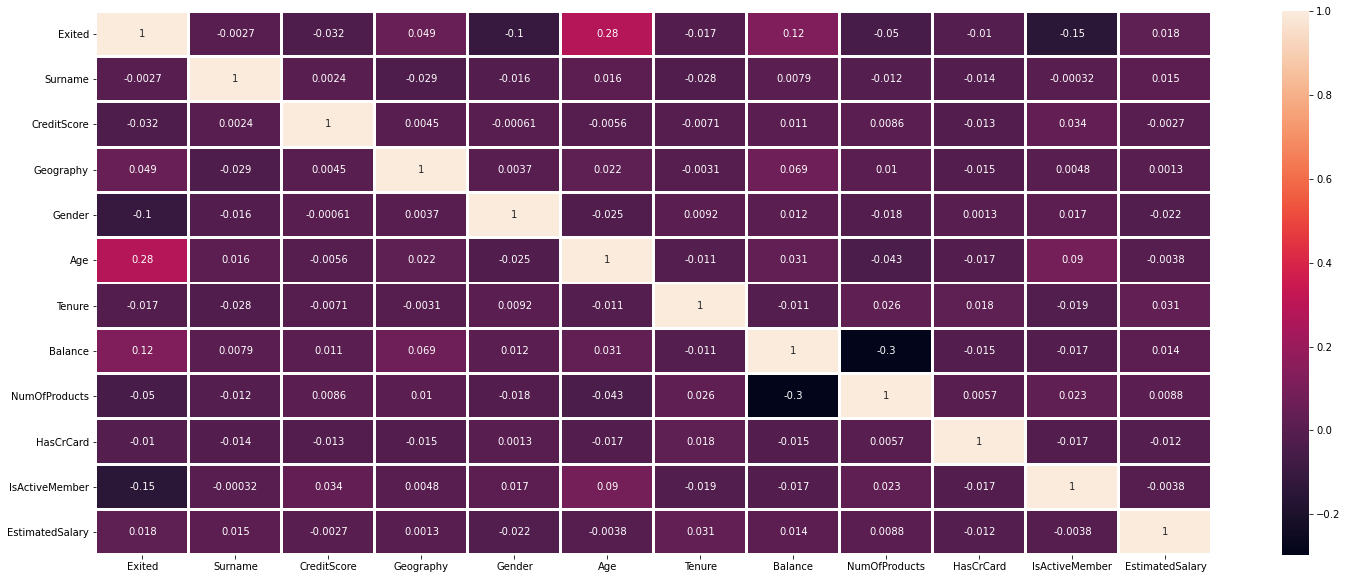

In [16]:

# creazione della heatmap

plt.figure(figsize=(25,10))
correlation = train_dataset.corr()
sns.heatmap(correlation, annot = True, linewidth = 2)

Surname

NumOfProducts

HasCrCard

Tenure

EstimatedSalary

In [17]:
train_dataset['Surname'].nunique()

2326

In [18]:
# il nome dei pokemon non è rilevante essendo unico per ogni pokemon, quindi si può droppare la colonna
# sia il nome dei primo che del secondo pokemon
train_dataset = train_dataset.drop('Surname', axis=1)

#ripeto tutto per il dataset di test
test_dataset = test_dataset.drop('Surname', axis=1)

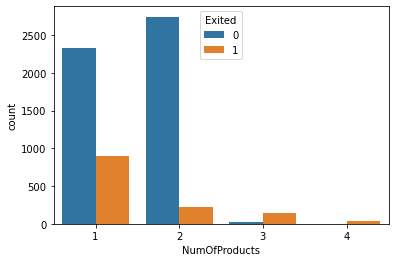

In [19]:
sns.countplot(x="NumOfProducts", hue="Exited", data=train_dataset)
plt.show()

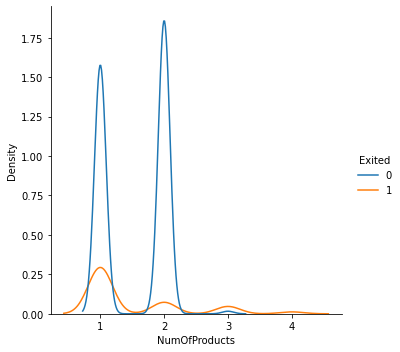

In [20]:
sns.displot(x="NumOfProducts", hue="Exited", data=train_dataset, kind="kde")
plt.show()

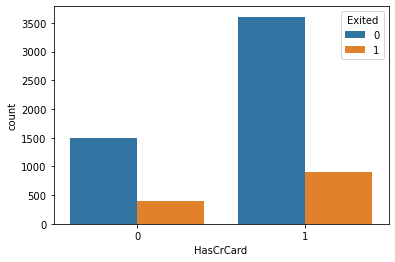

In [21]:

sns.countplot(x="HasCrCard", hue="Exited", data=train_dataset)
plt.show()

In [23]:
# il nome dei pokemon non è rilevante essendo unico per ogni pokemon, quindi si può droppare la colonna
# sia il nome dei primo che del secondo pokemon
train_dataset = train_dataset.drop('HasCrCard', axis=1)

#ripeto tutto per il dataset di test
test_dataset = test_dataset.drop('HasCrCard', axis=1)

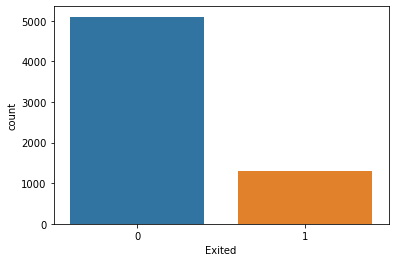

In [22]:
sns.countplot(x="Exited", data=train_dataset)
plt.show()

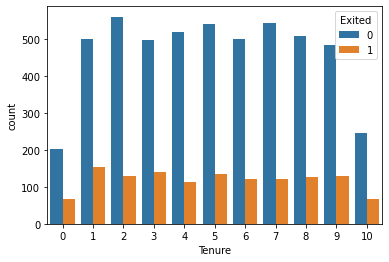

In [24]:
sns.countplot(x="Tenure", hue="Exited", data=train_dataset)
plt.show()

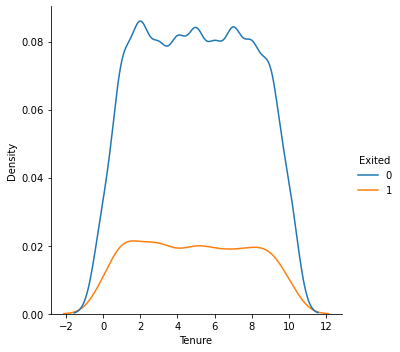

In [25]:
sns.displot(x="Tenure", hue="Exited", data=train_dataset, kind="kde")
plt.show()

In [26]:
# il nome dei pokemon non è rilevante essendo unico per ogni pokemon, quindi si può droppare la colonna
# sia il nome dei primo che del secondo pokemon
train_dataset = train_dataset.drop('Tenure', axis=1)

#ripeto tutto per il dataset di test
test_dataset = test_dataset.drop('Tenure', axis=1)

In [27]:
train_dataset["Diff_Balance_Salary"] = train_dataset.Balance - train_dataset.EstimatedSalary
test_dataset["Diff_Balance_Salary"] = test_dataset.Balance - test_dataset.EstimatedSalary

<AxesSubplot:>

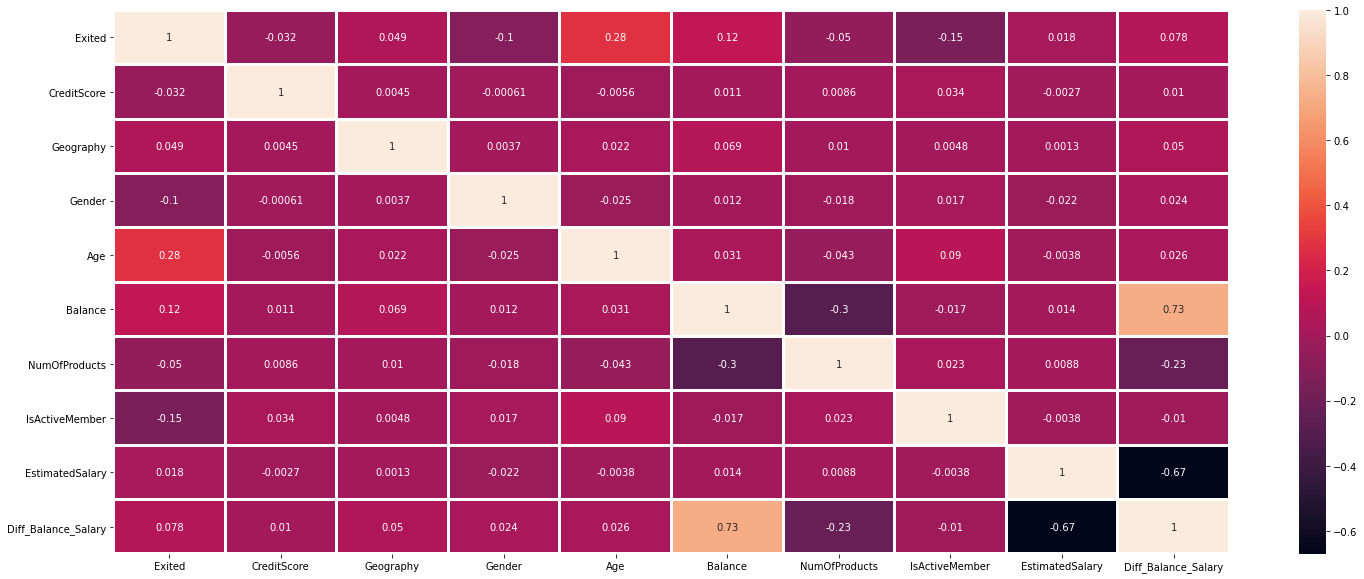

In [28]:
# creazione della heatmap

plt.figure(figsize=(25,10))
correlation = train_dataset.corr()
sns.heatmap(correlation, annot = True, linewidth = 2)

In [29]:
# il nome dei pokemon non è rilevante essendo unico per ogni pokemon, quindi si può droppare la colonna
# sia il nome dei primo che del secondo pokemon
train_dataset = train_dataset.drop('Balance', axis=1)
train_dataset = train_dataset.drop('EstimatedSalary', axis=1)


#ripeto tutto per il dataset di test
test_dataset = test_dataset.drop('Balance', axis=1)
test_dataset = test_dataset.drop('EstimatedSalary', axis=1)

In [30]:
train_dataset

,Exited,CreditScore,Geography,Gender,Age,NumOfProducts,IsActiveMember,Diff_Balance_Salary
0,0,675,0,1,32,3,0,-85901.09
1,0,848,2,1,35,2,0,35336.09
2,0,639,0,0,42,2,0,-167682.37
3,0,720,0,1,71,2,1,-14553.11
4,0,470,2,1,30,1,0,57091.08
...,...,...,...,...,...,...,...,...
6395,1,829,1,0,27,1,1,-7662.54
6396,0,569,2,1,31,1,0,-30121.25
6397,0,711,0,1,41,2,1,-193747.57
6398,0,751,1,1,54,2,1,40187.68


## Training

In [31]:
y_train = train_dataset.Exited          
X_train = train_dataset.drop(['Exited'], axis=1)  

y_test = test_dataset.Exited         
X_test = test_dataset.drop(['Exited'], axis=1)

In [41]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)
accuracy_lr = tree.score(X_test,y_test)

print(tree)
print('\n')
print("Accuracy: {:.3f}%".format(accuracy_lr*100))

DecisionTreeClassifier()


Accuracy: 78.375%


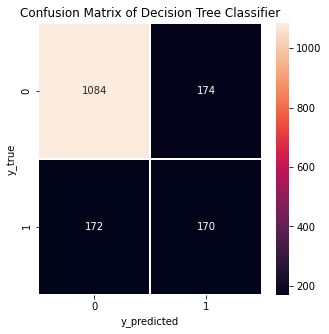




              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1258
           1       0.49      0.50      0.50       342

    accuracy                           0.78      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.78      0.78      0.78      1600






In [42]:
print('\n')
cm_lr = confusion_matrix(y_test,tree.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')

In [38]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_lr = clf.score(X_test,y_test)

print(clf)
print('\n')
print("Accuracy: {:.3f}%".format(accuracy_lr*100))

RandomForestClassifier()


Accuracy: 84.250%


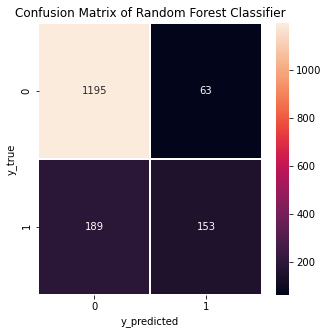




              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1258
           1       0.71      0.45      0.55       342

    accuracy                           0.84      1600
   macro avg       0.79      0.70      0.73      1600
weighted avg       0.83      0.84      0.83      1600






In [39]:

print('\n')
cm_lr = confusion_matrix(y_test,clf.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')